<a href="https://colab.research.google.com/github/vid-Math/ContentModeration/blob/master/NLP_LSTM_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vidmath25","key":"bc77157425995e7d28313e0822e6be57"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 #! kaggle datasets list

In [ ]:
! kaggle competitions download -c 'jigsaw-toxic-comment-classification-challenge'

 93% 49.0M/52.6M [00:01<00:00, 34.2MB/s]
100% 52.6M/52.6M [00:02<00:00, 26.5MB/s]


In [ ]:
! unzip /content/jigsaw-toxic-comment-classification-challenge.zip
! ls


Archive:  /content/jigsaw-toxic-comment-classification-challenge.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: test_labels.csv.zip     
  inflating: train.csv.zip           
jigsaw-toxic-comment-classification-challenge.zip  test.csv.zip
kaggle.json					   test_labels.csv.zip
sample_data					   train.csv.zip
sample_submission.csv.zip


In [ ]:
import pandas as pd
import re
import string

In [ ]:
#del(kaggle_data)

In [ ]:
kaggle_data = pd.read_csv('train.csv.zip')
kaggle_data = kaggle_data.rename(columns = {'comment_text':'tweet'})
kaggle_data['class'] = kaggle_data['toxic'] + kaggle_data['severe_toxic'] + kaggle_data['obscene'] +\
                            kaggle_data['threat'] + kaggle_data['insult'] + kaggle_data['identity_hate']
kaggle_data.loc[kaggle_data['class']>0,'class'] = 1
kaggle_data_1 = kaggle_data.copy()
del(kaggle_data)
print(kaggle_data_1.columns)
print(kaggle_data_1.shape)

kaggle_data_2 = pd.read_csv('https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv')
kaggle_data_2.loc[((kaggle_data_2['class']==0) | (kaggle_data_2['class']==1)),'class'] = 1
kaggle_data_2.loc[kaggle_data_2['class']==2,'class'] = 0
print(kaggle_data_2['class'].unique())
#print(kaggle_data_2['class'].dtype)
print(kaggle_data_2.columns)
print(kaggle_data_2.shape)


kaggle_data = pd.concat([kaggle_data_1[['tweet', 'class']],\
                            kaggle_data_2[['tweet', 'class']]])

del(kaggle_data_1, kaggle_data_2)
kaggle_data['old_tweet'] = kaggle_data['tweet']

Index(['id', 'tweet', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate', 'class'],
      dtype='object')
(159571, 9)
[0 1]
Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')
(24783, 7)


In [ ]:
testDF_text = pd.read_csv('test.csv.zip')
print(testDF_text.columns)
testDF = pd.read_csv('test_labels.csv.zip')
print(testDF.columns)
testDF['class'] = testDF['toxic'] + testDF['severe_toxic'] + testDF['obscene'] +\
                            testDF['threat'] + testDF['insult'] + testDF['identity_hate']
testDF.loc[testDF['class']>0,'class'] = 1
print(testDF['class'].unique())
testDF = testDF.loc[testDF['class']>=0]

testDF = pd.merge(testDF, testDF_text, on = 'id', how = 'left')
print(testDF.shape)



Index(['id', 'comment_text'], dtype='object')
Index(['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')
[-6  0  1]
(63978, 9)


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

from tensorflow import keras

import nltk

nltk.download("stopwords")

#!unzip /root/nltk_data/stopword.zip -d /root/nltk_data/corpora/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

# Create list of punctuation marks
punctuations = string.punctuation
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

# Remove URLs
def remove_urls(text):
    text = re.sub(r"\S*https?:\S*", "", text, flags=re.MULTILINE)
    text = re.sub(r"http?://\S+", "", text, flags=re.MULTILINE)
    return text

# remove stopwords
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('english')
def remove_stopwords(txt_clean):
    #txt_clean = [word for word in txt_tokenized if word not in stopwords]
    txt_clean = ' '.join(word for word in txt_clean.split() if word not in STOPWORDS) # remove stopwors from text
    return txt_clean

# porter stemming
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
def stemming(tokenized_text):
    text = [porter_stemmer.stem(word) for word in tokenized_text]
    return text

#
#nltk.download(wordnet)
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatization(token_txt):
    text = [wordnet_lemmatizer.lemmatize(word) for word in token_txt]
    return text

# Creat tokenizer function
def nltk_tokenizer(sentence):
    #print("sentence === ", sentence)

    sentence = sentence.lower()
    #sentence = sentence.replace(to_replace='&#\w+;', regex=True, value='')
    #sentence = sentence.replace(to_replace='rt', regex=True, value='')
    sentence = remove_urls(sentence)
    sentence = remove_punctuation(sentence)
    sentence = re.sub('[0-9]+', '', sentence)
    sentence = re.sub(r'[^\w\s]', '', sentence)
    sentence = remove_stopwords(sentence)

    #print("sentence=====",sentence)
    # Create token object from nltk
#     tokens = nltk.word_tokenize(sentence)
#     tokens = remove_stopwords(tokens)
#     tokens = stemming(tokens)
#     tokens = lemmatization(tokens)

    #print("tokens ====== ",tokens)
    # return preprocessed list of tokens
    return sentence

In [ ]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(1000000)
print(sys.getrecursionlimit())

kaggle_data["tweet"] = kaggle_data["tweet"].apply(nltk_tokenizer)

1000
1000000


In [ ]:
kaggle_data[:5]

,tweet,class,old_tweet
0,explanation edits made username hardcore metal...,0,Explanation\nWhy the edits made under my usern...
1,daww matches background colour im seemingly st...,0,D'aww! He matches this background colour I'm s...
2,hey man im really trying edit war guy constant...,0,"Hey man, I'm really not trying to edit war. It..."
3,cant make real suggestions improvement wondere...,0,"""\nMore\nI can't make any real suggestions on ..."
4,sir hero chance remember page thats,0,"You, sir, are my hero. Any chance you remember..."


In [ ]:
print(kaggle_data["tweet"].map(len).max())
print(kaggle_data["tweet"].map(len).min())
kaggle_data.loc[kaggle_data["tweet"].str.len()==0, 'class'].unique()

5000
0


array([0])

In [ ]:
X_train = kaggle_data['tweet']
Y_train = kaggle_data['class']
# list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
# y = kaggle_data[list_classes].values

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences

max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
list_tokenized_train = tokenizer.texts_to_sequences(X_train)
list_tokenized_test = tokenizer.texts_to_sequences(testDF['comment_text'])

maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)


In [ ]:
print(kaggle_data.shape)
print(list_tokenized_train[-1])
print(X_t.shape)

(184354, 3)
[19592, 2563, 1479, 4174, 3800, 3137, 1983, 1114, 459]
(184354, 200)


In [ ]:
#tokenizer.word_docs

In [ ]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=3)

In [ ]:
#Define LSTM model

vocab_size = 100 #max_tokens
max_len = 200
batch_size = 32

#Encoder
inputs = tf.keras.layers.Input(shape=(max_len,),name="tweet")
#Embedding
embed_size = 128
x = tf.keras.layers.Embedding(max_features, embed_size)(inputs)

x = tf.keras.layers.LSTM(60, return_sequences=True,name='lstm_layer')(x)
x = keras.layers.GlobalMaxPool1D()(x)

#x = tf.keras.layers.Dense(32, activation='sigmoid')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(50, activation='softmax')(x)
x = tf.keras.layers.Dropout(0.1)(x)

initializer = tf.keras.initializers.GlorotUniform(seed=42)
outputs = tf.keras.layers.Dense(1, kernel_initializer=initializer, activation="sigmoid")(x)

model = tf.keras.models.Model(inputs, outputs)
model.summary()

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=[keras.metrics.BinaryAccuracy()]) #metrics was mae, optimiser was rmsprop

# history = model.fit(train_dataset,
#                     epochs=50,
#                     validation_data=val_dataset,
#                     callbacks=callbacks)

# model = tf.keras.models.Model(inputs=[inputs, targets],outputs=x)
# model.summary()

# loss = tf.keras.losses.SparseCategoricalCrossentropy()
# model.compile(optimizer='rmsprop', loss=loss, metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tweet (InputLayer)          [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 lstm_layer (LSTM)           (None, 200, 60)           45360     
                                                                 
 global_max_pooling1d (Globa  (None, 60)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 50)                3050      
                                                             

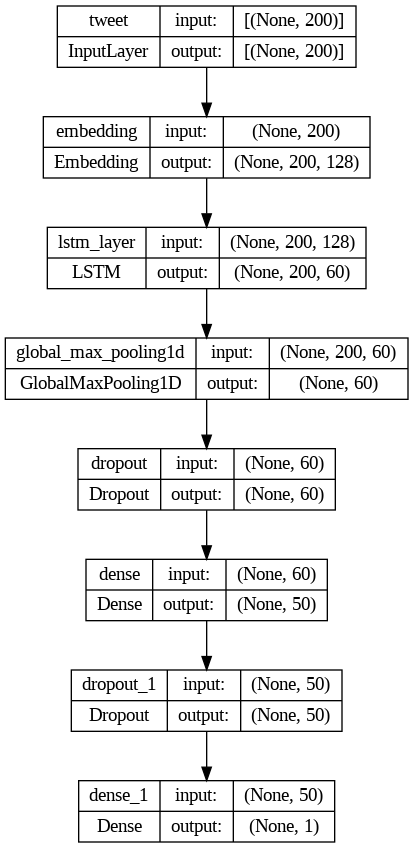

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
batch_size = 32
epochs = 10
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
model.fit(X_t,Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,
          callbacks=[callback])

Epoch 1/10
5185/5185 [==============================] - 203s 38ms/step - loss: 0.2549 - binary_accuracy: 0.9202 - val_loss: 0.2965 - val_binary_accuracy: 0.9473
Epoch 2/10
5185/5185 [==============================] - 72s 14ms/step - loss: 0.1361 - binary_accuracy: 0.9542 - val_loss: 0.1807 - val_binary_accuracy: 0.9480
Epoch 3/10
5185/5185 [==============================] - 67s 13ms/step - loss: 0.1097 - binary_accuracy: 0.9586 - val_loss: 0.1487 - val_binary_accuracy: 0.9469
Epoch 4/10
5185/5185 [==============================] - 65s 13ms/step - loss: 0.0912 - binary_accuracy: 0.9661 - val_loss: 0.1553 - val_binary_accuracy: 0.9420
Epoch 5/10
5185/5185 [==============================] - 65s 13ms/step - loss: 0.0731 - binary_accuracy: 0.9764 - val_loss: 0.1613 - val_binary_accuracy: 0.9412


In [ ]:
# import joblib
# joblib.dump(model, 'model_lstm.pkl')
model.save('model_lstm.keras')

In [ ]:
pred = model.predict(X_te)

2000/2000 [==============================] - 14s 7ms/step


In [ ]:
#keras.saving.load_model('model_lstm.keras')

In [ ]:
import numpy as np
np.max(pred)

0.9898168